In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns

students=[chr(i+64) for i in range (1,100)]
math_marks=[random.randrange(1,100) for i in range(len(students))]
science_marks=[random.randrange(1,100) for i in range(len(students))]

print(len(students),len(math_marks),len(science_marks))
data_frame=pd.DataFrame({
    'Names': students,
    'Maths': math_marks,
    'Science': science_marks
})

display(data_frame)

99 99 99


,Names,Maths,Science
0,A,80,95
1,B,15,42
2,C,66,61
3,D,26,84
4,E,35,81
...,...,...,...
94,,14,26
95,,94,66
96,¡,88,11
97,¢,37,63


Text(0, 0.5, 'Science')

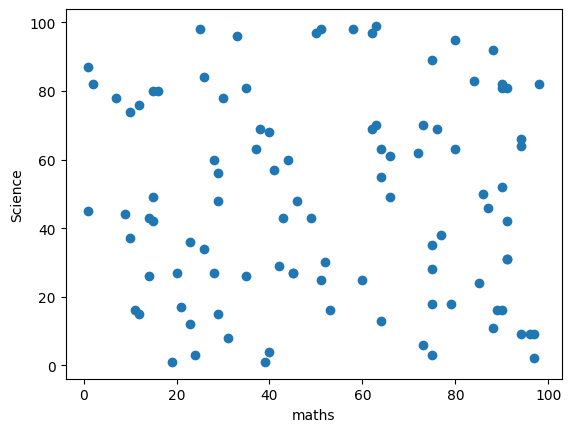

In [10]:
plt.scatter(data_frame['Maths'],data_frame['Science'])
plt.xlabel('maths')
plt.ylabel('Science')

In [12]:
Kmeans = KMeans(n_clusters=4,random_state=42)

#fit the model
Kmeans.fit(data_frame[['Maths','Science']])

#add the cluster labels to the Dataframe
data_frame['Cluster'] =Kmeans.labels_

display(data_frame)

,Names,Maths,Science,Cluster
0,A,80,95,0
1,B,15,42,1
2,C,66,61,0
3,D,26,84,1
4,E,35,81,1
...,...,...,...,...
94,,14,26,1
95,,94,66,0
96,¡,88,11,2
97,¢,37,63,1


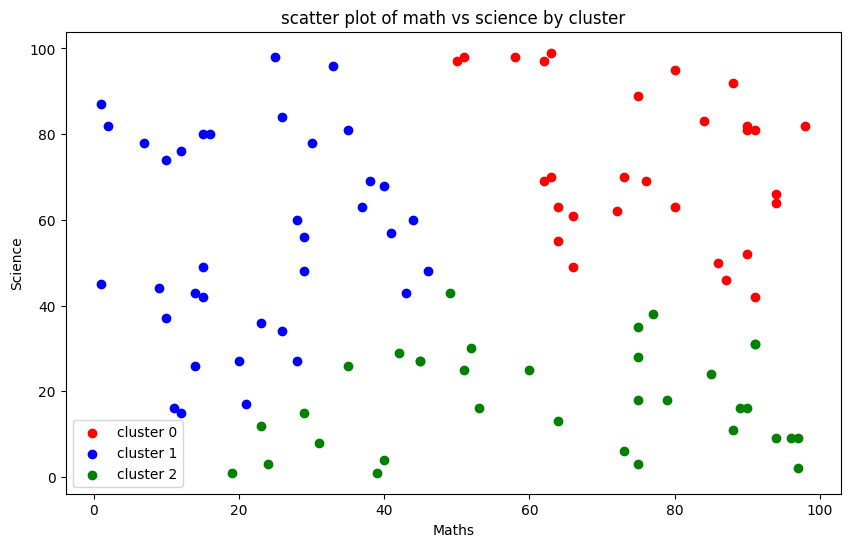

In [13]:
#define colors for each cluster
colors={0:'red',1:'blue',2:'green',4:'purple'}

#create the scatter plot
plt.figure(figsize=(10,6))
for cluster in data_frame['Cluster'].unique():
    subset = data_frame[data_frame['Cluster']==cluster]
    plt.scatter(subset['Maths'],subset['Science'],color=colors[cluster],label=f'cluster {cluster}')

#add labels and title
plt.xlabel('Maths')
plt.ylabel('Science')
plt.title('scatter plot of math vs science by cluster')
plt.legend()
plt.show()